In [2]:
import pandas as pd
import numpy as np
import os
main_path= "C:/Users/tsant/Downloads"
cars_path = main_path + "/used_cars_data.csv"
df = pd.read_csv(cars_path, sep=",")

C:\Users\tsant\AppData\Local\Temp\ipykernel_12732\1825546746.py:6: DtypeWarning: Columns (0: dealer_zip) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cars_path, sep=",")


In [3]:
################################################################################################
# FILTRES POUR HOMOGENEISER ET FIABILISER LES DONNEES
################################################################################################
df = df[df["bed"].isna()]
df = df[df["cabin"].isna()]
df = df[df["frame_damaged"] != True]
df = df[df["has_accidents"] != True]
df = df[df["isCab"] != True]
df = df[~df["main_picture_url"].isna()]
df = df[(df["owner_count"].isna()) | (df["owner_count"] == 1)]
df = df[df["salvage"] != True]
df = df[df["theft_title"] != True]
df = df[df["daysonmarket"] < 365]

df = df.drop(["bed", "bed_height", "cabin", "city", "dealer_zip",
              "description", "exterior_color", "has_accidents", "interior_color",
              "isCab", "frame_damaged", "latitude", "longitude", "main_picture_url", "owner_count",
              "is_certified", "is_cpo", "salvage", "savings_amount", "seller_rating", "sp_id", "theft_title",
              "vehicle_damage_category"], axis=1)

SUPPRESSION DE 50% DU DATAFRAME

In [4]:
used_cars_data_shorter=df.sample(frac=0.5,random_state=42)
csv_path = main_path + "/used_cars_data_shorter.csv"
df.to_csv(csv_path, index=False)

SEPARATION TRAIN ET TEST

In [5]:
cars1=pd.read_csv(r'C:\Users\tsant\Downloads\used_cars_data_shorter.csv')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

SEED = 32
df_train, df_test = train_test_split(cars1, test_size=0.2, random_state=SEED)

ANALYSE EXPLORATOIRE

In [6]:
df_train.info()
df_train.head()

<class 'pandas.DataFrame'>
Index: 1451463 entries, 725752 to 10967
Data columns (total 43 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vin                   1451463 non-null  str    
 1   back_legroom          1377195 non-null  str    
 2   bed_length            204220 non-null   str    
 3   body_type             1443908 non-null  str    
 4   city_fuel_economy     1233026 non-null  float64
 5   combine_fuel_economy  0 non-null        float64
 6   daysonmarket          1451463 non-null  int64  
 7   engine_cylinders      1405284 non-null  str    
 8   engine_displacement   1366463 non-null  float64
 9   engine_type           1405284 non-null  str    
 10  fleet                 541522 non-null   object 
 11  franchise_dealer      1451463 non-null  bool   
 12  franchise_make        1322853 non-null  str    
 13  front_legroom         1377195 non-null  str    
 14  fuel_tank_volume      1377195 non-null  str    

,vin,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
725752,5FNYF6H21MB006293,38.4 in,NaN,SUV / Crossover,19.0,NaN,54,V6,3500.0,V6,...,"262 lb-ft @ 4,700 RPM",A,Automatic,t93929,SE AWD,AWD,All-Wheel Drive,111 in,78.6 in,2021
1602288,3N1CP5BV2LL488229,33.2 in,NaN,SUV / Crossover,31.0,NaN,253,I4,1600.0,I4,...,"114 lb-ft @ 4,000 RPM",CVT,Continuously Variable Transmission,t90148,S FWD,FWD,Front-Wheel Drive,103.1 in,69.3 in,2020
860720,JN8AT2MT6KW253789,37.9 in,NaN,SUV / Crossover,26.0,NaN,10,I4,2500.0,I4,...,"175 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,t83705,SV FWD,FWD,Front-Wheel Drive,106.5 in,72.4 in,2019
1569424,JHMCR6F55HC007317,38.5 in,NaN,Sedan,49.0,NaN,20,I4 Hybrid,2000.0,I4 Hybrid,...,NaN,CVT,Continuously Variable Transmission,t67707,EX-L,FWD,Front-Wheel Drive,109.3 in,72.8 in,2017
912623,5YFEPMAE9MP154754,34.8 in,NaN,Sedan,30.0,NaN,0,I4,1800.0,I4,...,NaN,CVT,Continuously Variable Transmission,t92966,LE FWD,FWD,Front-Wheel Drive,106.3 in,70.1 in,2021


In [7]:
df_train.isna().mean()*100

vin                       0.000000
back_legroom              5.116768
bed_length               85.930058
body_type                 0.520509
city_fuel_economy        15.049436
combine_fuel_economy    100.000000
daysonmarket              0.000000
engine_cylinders          3.181549
engine_displacement       5.856160
engine_type               3.181549
fleet                    62.691298
franchise_dealer          0.000000
franchise_make            8.860715
front_legroom             5.116768
fuel_tank_volume          5.116768
fuel_type                 2.438161
height                    5.116768
highway_fuel_economy     15.049436
horsepower                5.856160
is_new                    0.000000
is_oemcpo                94.985060
length                    5.116768
listed_date               0.000000
listing_color             0.000000
listing_id                0.000000
major_options             6.145110
make_name                 0.000000
maximum_seating           5.116768
mileage             

SUPPRESSION DES COLONNES AVEC BCP DE VM

In [8]:
variables=['bed_length','combine_fuel_economy','fleet','is_oemcpo']
df_train=df_train.drop(variables,axis=1)

VARIABLES NUMERIQUES


In [9]:
varnum=['city_fuel_economy','daysonmarket','engine_displacement','highway_fuel_economy','horsepower','mileage','price','year']
df_train[varnum].describe()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,mileage,price,year
count,1.233026e+06,1.451463e+06,1.366463e+06,1.233026e+06,1.366463e+06,1.377496e+06,1.451463e+06,1.451463e+06
mean,2.336350e+01,7.679651e+01,2.845424e+03,2.996361e+01,2.461950e+02,1.509772e+04,3.325317e+04,2.018873e+03
std,9.420365e+00,8.562134e+01,1.301812e+03,8.053004e+00,9.083701e+01,2.912545e+04,1.902906e+04,3.145131e+00
min,9.000000e+00,0.000000e+00,7.000000e+02,1.100000e+01,5.500000e+01,0.000000e+00,2.990000e+02,1.915000e+03
25%,1.800000e+01,1.800000e+01,2.000000e+03,2.500000e+01,1.740000e+02,5.000000e+00,2.198800e+04,2.018000e+03
50%,2.200000e+01,4.100000e+01,2.500000e+03,2.900000e+01,2.400000e+02,1.200000e+01,2.912000e+04,2.020000e+03
75%,2.600000e+01,9.400000e+01,3.500000e+03,3.300000e+01,3.000000e+02,2.219425e+04,4.094900e+04,2.020000e+03
max,1.270000e+02,3.640000e+02,8.400000e+03,1.270000e+02,9.490000e+02,1.225238e+06,2.749950e+06,2.021000e+03


<Axes: >

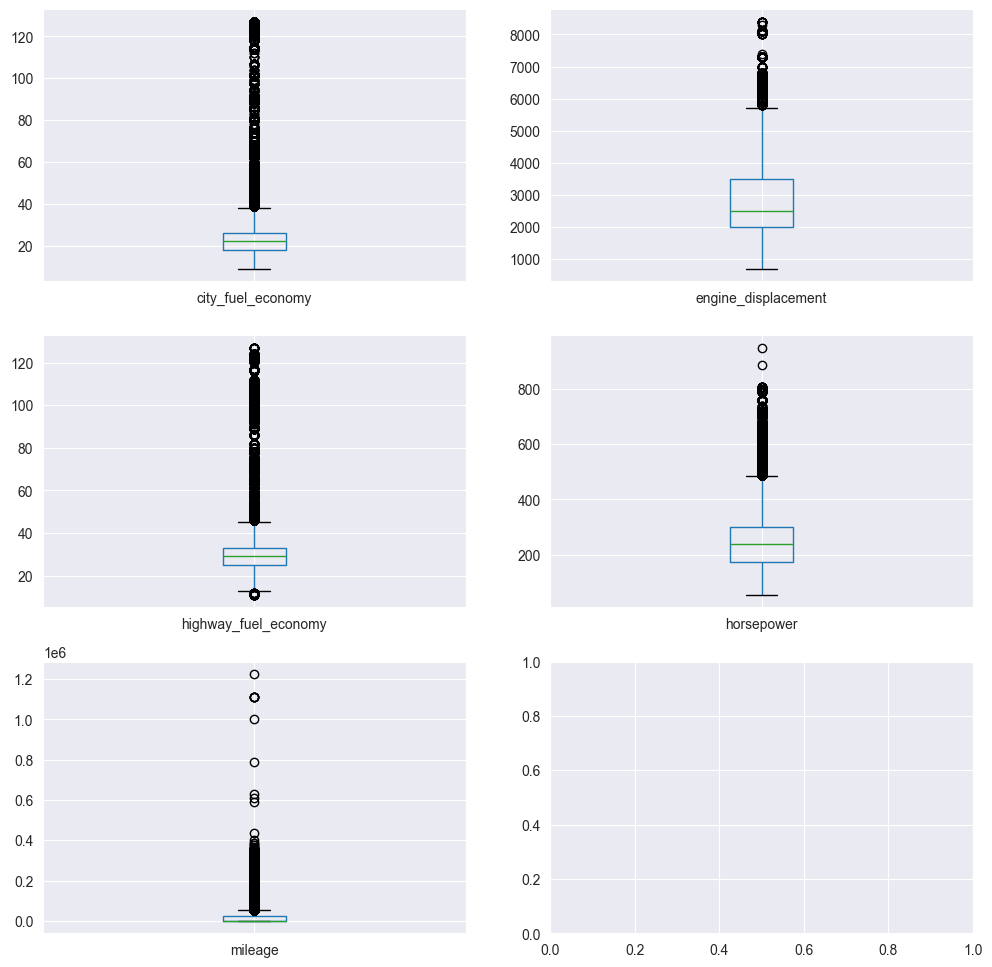

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

df_train.boxplot(column="city_fuel_economy", ax=axes[0,0])
df_train.boxplot(column="engine_displacement", ax=axes[0,1])
df_train.boxplot(column="highway_fuel_economy", ax=axes[1,0])
df_train.boxplot(column="horsepower", ax=axes[1,1])
df_train.boxplot(column="mileage", ax=axes[2,0])

<Axes: >

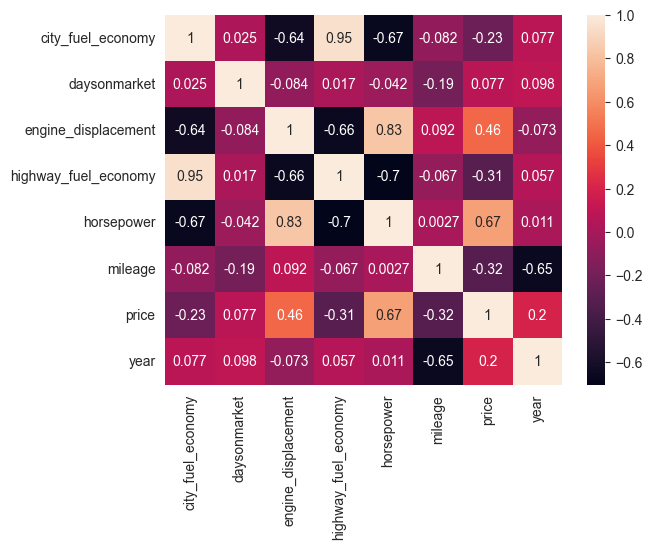

In [11]:
sns.heatmap(df_train[varnum].corr(),annot=True)


GERONS MAINTENANT LES VALEURS MANQUANTES En choisissant 'price' commme target, pour toutes les variables numeriques ayant des VM aux environs de 5% , je decide de supprimer les lignes correspondantes , si % de VM superieur, j'analyse la correlation avec la target avant toutes transformation

In [12]:
#pour ces variables on va juste supprimer les lignes avec VM
numvar=['engine_displacement','horsepower','mileage']
df_train=df_train.dropna(subset=numvar)
#verif
df_train.isna().mean()*100

vin                      0.000000
back_legroom             0.029431
body_type                0.001695
city_fuel_economy       10.811502
daysonmarket             0.000000
engine_cylinders         0.922993
engine_displacement      0.000000
engine_type              0.922993
franchise_dealer         0.000000
franchise_make           9.246035
front_legroom            0.029431
fuel_tank_volume         0.029431
fuel_type                0.922762
height                   0.029431
highway_fuel_economy    10.811502
horsepower               0.000000
is_new                   0.000000
length                   0.029431
listed_date              0.000000
listing_color            0.000000
listing_id               0.000000
major_options            5.230013
make_name                0.000000
maximum_seating          0.029431
mileage                  0.000000
model_name               0.000000
power                   12.682528
price                    0.000000
sp_name                  0.000000
torque        

In [13]:
#Passons mtn aux variables cityfueleconomy et highwayfueleconomy qui ont plus de 5% de VM
df_train.shape
#Comment on a bcp de lignes et de colonnes je decide de supprimer aussi les lignes avec des VM pour ces deux variables
numvar1=['city_fuel_economy','highway_fuel_economy']
df_train=df_train.dropna(subset=numvar1)
#Verif
df_train.isna().mean()*100

vin                      0.000000
back_legroom             0.019955
body_type                0.001382
city_fuel_economy        0.000000
daysonmarket             0.000000
engine_cylinders         0.001037
engine_displacement      0.000000
engine_type              0.001037
franchise_dealer         0.000000
franchise_make           9.194444
front_legroom            0.019955
fuel_tank_volume         0.019955
fuel_type                0.000777
height                   0.019955
highway_fuel_economy     0.000000
horsepower               0.000000
is_new                   0.000000
length                   0.019955
listed_date              0.000000
listing_color            0.000000
listing_id               0.000000
major_options            4.902287
make_name                0.000000
maximum_seating          0.019955
mileage                  0.000000
model_name               0.000000
power                   12.626563
price                    0.000000
sp_name                  0.000000
torque        

PASSONS MAINTENANT AUX AUTRES VARIABLES JE VAIS D'ABORDS ESSAYER DE SUPPRIMER LES LIGNES AVEC DES VM

In [14]:
strvar=['back_legroom','body_type','engine_cylinders','engine_type','front_legroom','fuel_tank_volume','fuel_type','height','length','major_options','maximum_seating','transmission','transmission_display','wheel_system','wheel_system_display','wheelbase','width']
df_train=df_train.dropna(subset=strvar)

In [15]:
strvar1=['franchise_make','power','torque']
df_train=df_train.dropna(subset=strvar1)

In [16]:
df_train.shape

(847335, 39)

SUPPRESSION DES COLONNES INUTILES

In [17]:
#suppression de tout ce qui est identifiant
var=['vin','listing_id',]
df_train=df_train.drop(var,axis=1)

In [18]:
df_train.duplicated()

725752     False
1602288    False
860720     False
763237     False
217553     False
           ...  
1466620    False
384403     False
655237     False
370219     False
10967      False
Length: 847335, dtype: bool

ANALYSE DES VAR STR

In [19]:
strcols = df_train.select_dtypes(include="object").columns

for col in strcols:
    n_unique = df_train[col].nunique()

    if n_unique > 1000:
        print(col, "->texte libre")

    elif n_unique > 50:
        print(col, "-> catégorielle haute cardinalité ")

    else:
        print(col, "-> catégorielle classique ")

C:\Users\tsant\AppData\Local\Temp\ipykernel_12732\3585221344.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  strcols = df_train.select_dtypes(include="object").columns


back_legroom -> catégorielle haute cardinalité 
body_type -> catégorielle classique 
engine_cylinders -> catégorielle classique 
engine_type -> catégorielle classique 
franchise_make -> catégorielle classique 
front_legroom -> catégorielle haute cardinalité 
fuel_tank_volume -> catégorielle haute cardinalité 
fuel_type -> catégorielle classique 
height -> catégorielle haute cardinalité 
length -> catégorielle haute cardinalité 
listed_date -> catégorielle haute cardinalité 
listing_color -> catégorielle classique 
major_options ->texte libre
make_name -> catégorielle haute cardinalité 
maximum_seating -> catégorielle classique 
model_name -> catégorielle haute cardinalité 
power ->texte libre
sp_name ->texte libre
torque ->texte libre
transmission -> catégorielle classique 
transmission_display -> catégorielle classique 
trimId ->texte libre
trim_name ->texte libre
wheel_system -> catégorielle classique 
wheel_system_display -> catégorielle classique 
wheelbase -> catégorielle haute ca

In [20]:
#Analyse des var " texte libre"
df_train['sp_name'].value_counts()

sp_name
Honda World                      1024
Rock Honda                        802
Jeff Wyler Eastgate Auto Mall     776
Varsity Ford                      773
Newton Nissan of Gallatin         695
                                 ... 
Studebaker Buick GMC                1
Struckman Ford Incorporated         1
Rinke Chevrolet-Buick-GMC           1
Sherman Cadillac                    1
Tranquillity Chevrolet              1
Name: count, Length: 12485, dtype: int64

In [21]:
df_train['power'].value_counts()

power
395 hp @ 5,750 RPM    38395
355 hp @ 5,600 RPM    27272
138 hp @ 4,900 RPM    26225
395 hp @ 5,600 RPM    22225
170 hp @ 6,000 RPM    20401
                      ...  
260 hp @ 5,300 RPM        1
268 hp @ 5,000 RPM        1
532 hp @ 7,250 RPM        1
156 hp @ 5,500 RPM        1
552 hp @ 8,700 RPM        1
Name: count, Length: 1093, dtype: int64

In [22]:
df_train['trimId'].value_counts()

trimId
t87739    13086
t86414     9501
t85772     6253
t85771     5550
t88293     5383
          ...  
t53445        1
t29483        1
t30106        1
t52191        1
t67672        1
Name: count, Length: 14847, dtype: int64

In [23]:
df_train['torque'].value_counts()

torque
400 lb-ft @ 4,500 RPM    34809
383 lb-ft @ 4,100 RPM    27272
148 lb-ft @ 200 RPM      25598
410 lb-ft @ 3,950 RPM    22068
132 lb-ft @ 4,500 RPM    21925
                         ...  
242 lb-ft @ 2,800 RPM        1
434 lb-ft @ 5,250 RPM        1
354 lb-ft @ 6,800 RPM        1
272 lb-ft @ 4,000 RPM        1
252 lb-ft @ 4,500 RPM        1
Name: count, Length: 1089, dtype: int64

In [24]:
df_train['trim_name'].value_counts()

trim_name
SE FWD                                   25435
S FWD                                    18396
XLT SuperCrew 4WD                        16732
SV FWD                                   14110
LX FWD                                   13614
                                         ...  
LT Fleet FWD                                 1
100th Anniversary Special Edition RWD        1
TDI Sport with Nav                           1
Extended Wheelbase                           1
4 Dr SR5 V8 4WD                              1
Name: count, Length: 3682, dtype: int64

In [25]:
df_train['major_options'].value_counts()

major_options
['Alloy Wheels', 'Bluetooth', 'Backup Camera']                                                                                                                                                                                                                                                                                                                                         25012
['Bluetooth', 'Backup Camera']                                                                                                                                                                                                                                                                                                                                                         11702
['Steel Wheels', 'Bluetooth', 'Backup Camera']                                                                                                                                                                                  

In [26]:
#suppression des variables qui seront difficile à encoder ( cardinalité élevée , texte libre bizarre et celles que je juge inutile et qui se repètent également
vars=['major_options','torque','power','trimId','trim_name','sp_name','transmission_display','wheel_system_display','franchise_make',]
df_train=df_train.drop(vars,axis=1)

In [27]:
#on peut encore enlever d'autres variables qui sont ambigues pour predire le prix
vars1=['listed_date','listing_color','daysonmarket',]
df_train=df_train.drop(vars1,axis=1)

StandarScaler pour les variables numeriques

In [28]:
scaler=StandardScaler()
df_train[['city_fuel_economy','engine_displacement','highway_fuel_economy','horsepower','mileage','year']]=scaler.fit_transform(df_train[['city_fuel_economy','engine_displacement','highway_fuel_economy','horsepower','mileage','year']])

In [29]:
#Certaines colonnes sont en str car elles ont des unités , il faut transformer en numeriques ( float)
cols_to_fix = ['fuel_tank_volume', 'height', 'length', 'width', 'wheelbase', 'back_legroom', 'front_legroom']

for col in cols_to_fix:
    # On extrait le nombre (incluant le point décimal) et on convertit en float
    df_train[col] = df_train[col].str.extract(r'(\d+\.?\d*)').astype(float)

In [30]:
#Cas particulier pour engine cyclinders qui contient  du texte comme V6 , L4
# On ne garde que les chiffres de la colonne cylindres
df_train['engine_cylinders'] = df_train['engine_cylinders'].str.extract(r'(\d+)').astype(float)

In [31]:
#après transformation certaines colonnes sont vides car n'ont peut être pas contenu des nombres
print(df_train[cols_to_fix].isnull().sum())

fuel_tank_volume       54
height                 40
length                 40
width                  40
wheelbase              40
back_legroom        12807
front_legroom        4000
dtype: int64


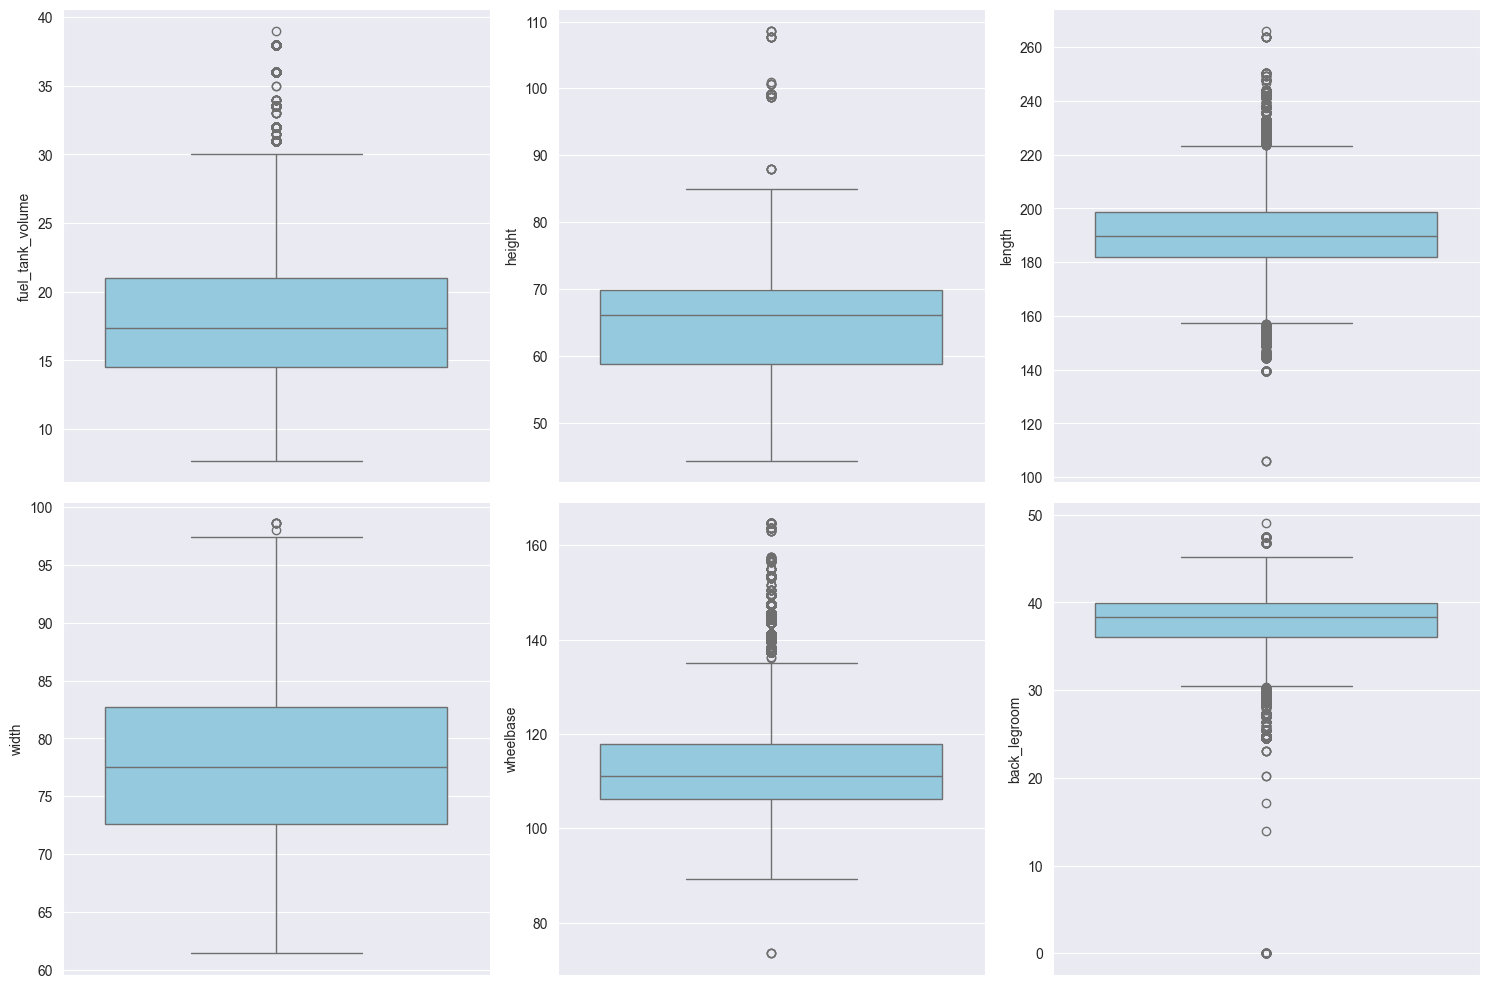

In [32]:
#On va remplir les vides pour faciliter le travail
#Pour savoir si on choisi la mediane ou la moyenne , on va observer les outliars
# On crée une grille de graphiques
cols=['fuel_tank_volume', 'height', 'length', 'width', 'wheelbase', 'back_legroom']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols):
    plt.subplot(2, 3, i+1) # Crée une petite case pour chaque variable
    sns.boxplot(y=df_train[col], color="skyblue")

plt.tight_layout()
plt.show()

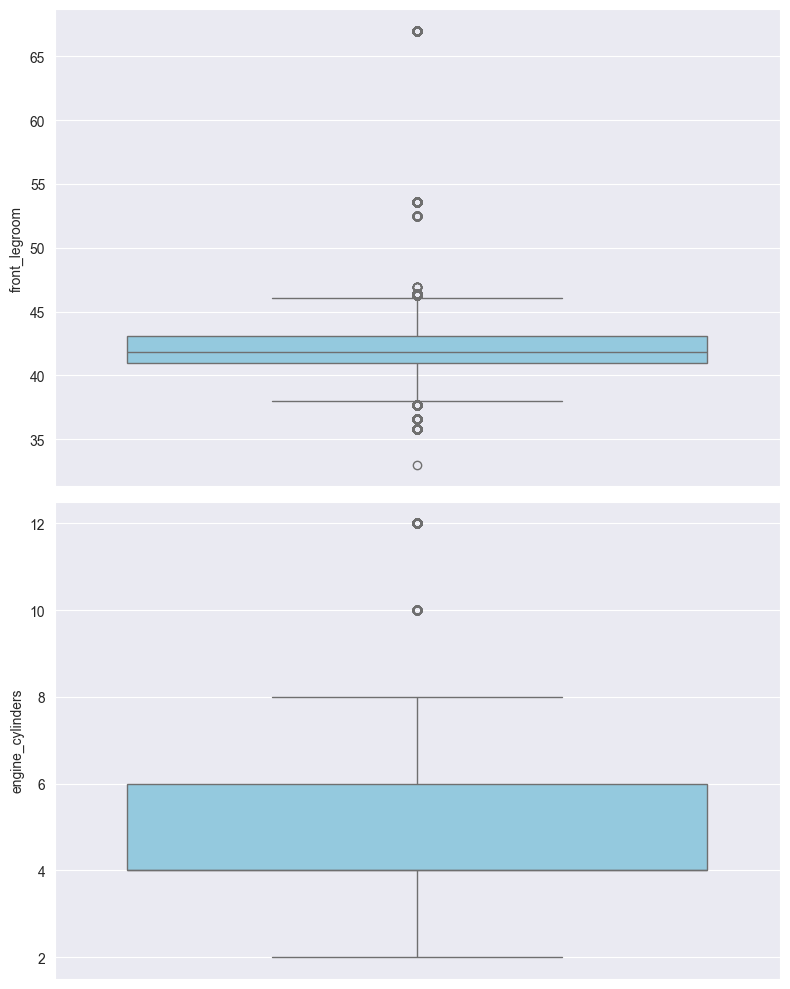

In [33]:
cols1=['front_legroom','engine_cylinders']
plt.figure(figsize=(8, 10)) # Plus haut que large pour du 2x1

for i, col in enumerate(cols1):
    # On ajoute i+1 comme 3ème argument
    plt.subplot(2, 1, i + 1)
    sns.boxplot(y=df_train[col], color="skyblue")

plt.tight_layout()
plt.show()

In [34]:
#On va remplacer les vides par la mediane comme il y a des outliers
# Pour chaque colonne, on remplace les NaN par la médiane de cette colonne
# Liste des colonnes numériques (assurez-vous qu'elles ont été converties en float avant)
cols_vides = [
    'city_fuel_economy', 'engine_displacement', 'highway_fuel_economy',
    'horsepower', 'mileage', 'fuel_tank_volume', 'height', 'length',
    'width', 'wheelbase', 'back_legroom', 'front_legroom', 'engine_cylinders'
]

for col in cols_vides:
    median_value = df_train[col].median()
    df_train[col] = df_train[col].fillna(median_value)

# Vérification finale
print(df_train[cols_to_fix].isnull().sum())

fuel_tank_volume    0
height              0
length              0
width               0
wheelbase           0
back_legroom        0
front_legroom       0
dtype: int64


In [35]:
scaler=StandardScaler()
df_train[['city_fuel_economy', 'engine_displacement', 'highway_fuel_economy',
    'horsepower', 'mileage', 'fuel_tank_volume', 'height', 'length',
    'width', 'wheelbase', 'back_legroom', 'front_legroom', 'engine_cylinders']]=scaler.fit_transform(df_train[['city_fuel_economy', 'engine_displacement', 'highway_fuel_economy',
    'horsepower', 'mileage', 'fuel_tank_volume', 'height', 'length',
    'width', 'wheelbase', 'back_legroom', 'front_legroom', 'engine_cylinders']])

OneHotEncoding

In [36]:
encoder=OneHotEncoder(sparse_output=False)
encoded=encoder.fit_transform(df_train[['body_type', 'fuel_type', 'make_name', 'transmission', 'wheel_system']])
encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], shape=(847335, 76))